In [1]:
import numpy as np
import pandas as pd

In [2]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
lat, lon, year =27.877928,85.274818,2000 

# You must request an NSRDB api key from the link above
api_key = 'PUt8OMN6vPFfyMSuHhYa4Y8vgsuFH5jaetWByYcW'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'ghi,solar_zenith_angle,wind_speed,air_temperature,dhi,dni'
# Choose year of data
year = '2012'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '60'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Deependra+Neupane'
# Your reason for using the NSRDB.
reason_for_use = 'research'
# Your affiliation
your_affiliation = 'ioe'
# Your email address
your_email = 'deependran.neupane@gmail.com'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/suny-india-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [8]:
info.columns

Index(['Source', 'Location ID', 'City', 'State', 'Country', 'Latitude',
       'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone',
       'Clearsky DHI Units', 'Clearsky DNI Units', 'Clearsky GHI Units',
       'Dew Point Units', 'DHI Units', 'DHI Perez Units', 'DNI Units',
       'DNI Perez Units', 'GHI Units', 'GHI Perez Units',
       'Solar Zenith Angle Units', 'Temperature Units', 'Pressure Units',
       'Relative Humidity Units', 'Precipitable Water Units',
       'Wind Direction Units', 'Wind Speed Units', 'Snow Depth Units',
       'Fill Flag 0', 'Fill Flag 1', 'Fill Flag 2', 'Fill Flag 3',
       'Fill Flag 4', 'Fill Flag 5', 'Version'],
      dtype='object')

In [4]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/suny-india-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

# take a look
df.head()

,Year,Month,Day,Hour,Minute,GHI,Solar Zenith Angle,Wind Speed,Temperature,DHI,DNI
2012-01-01 00:00:00,2012,1,1,0,0,0,170.23,2.1,3,0,0
2012-01-01 01:00:00,2012,1,1,1,0,0,157.47,2.1,3,0,0
2012-01-01 02:00:00,2012,1,1,2,0,0,144.24,2.1,3,0,0
2012-01-01 03:00:00,2012,1,1,3,0,0,131.02,2.0,3,0,0
2012-01-01 04:00:00,2012,1,1,4,0,0,117.97,2.0,3,0,0


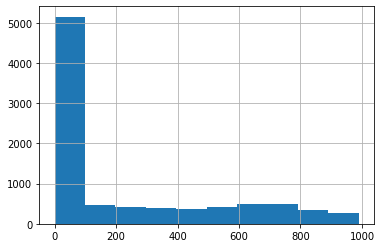

In [5]:
df['GHI'].hist() 

In [6]:
import requests as req
import random
import matplotlib.pyplot as plt

In [24]:
cap_fac = []
ghi = []
location = []
for i in range(200):    
    lon = random.uniform(80.06014, 88.20401)
    lat = random.uniform(26.347515, 30.447021)
    print('data for lat = {} and lon = {}'.format(lat,lon))
    url = 'https://developer.nrel.gov/api/pvwatts/v6.json?api_key=yourkeyhere&lat={}&lon={}&system_capacity=4&azimuth=180&tilt=40&array_type=1&module_type=1&losses=10'.format(lat,lon)
    resp = req.get(url)
    data = resp.json()
    try:
        cf = data['outputs']['capacity_factor']
        sol_rad = data['outputs']['solrad_annual']
        location.append([lat,lon])
        cap_fac.append(cf)
        ghi.append(sol_rad)
        print("data of",i)
    except:
        print('data not availeble')

data for lat = 29.6328960775092 and lon = 87.1520584334189
data of 0
data for lat = 29.300237892589163 and lon = 83.74762152451949
data of 1
data for lat = 26.897896812923996 and lon = 87.81025423137235
data of 2
data for lat = 29.758821026457667 and lon = 82.6169398858646
data of 3
data for lat = 28.131294879940647 and lon = 84.34331856145582
data of 4
data for lat = 26.662770656864957 and lon = 87.01599949899449
data of 5
data for lat = 28.886066317385175 and lon = 80.48897823152949
data of 6
data for lat = 27.061726112083587 and lon = 81.33618000710541
data of 7
data for lat = 28.826089874662074 and lon = 86.28651057589015
data of 8
data for lat = 29.265132950381194 and lon = 82.39726791412059
data of 9
data for lat = 26.629360542447472 and lon = 87.54210886328545
data of 10
data for lat = 29.769013402784005 and lon = 84.58026903147318
data of 11
data for lat = 30.205356170390004 and lon = 86.75890597256235
data of 12
data for lat = 28.62774848774813 and lon = 84.01817674109027
data

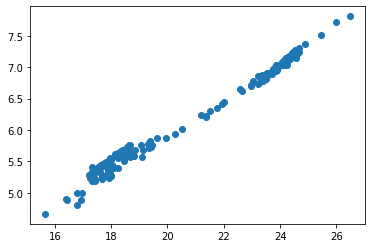

In [25]:
plt.scatter(cap_fac,ghi)

In [28]:
cap_ghi = pd.DataFrame()
cap_ghi['ghi'] = ghi
cap_ghi['cap_fac']= cap_fac
cap_ghi['locaiton']= location
cap_ghi.to_csv('cap_ghi.csv')

In [29]:
cap_ghi = pd.read_csv('cap_ghi.csv')

In [30]:
cap_ghi['cap_fac']/100

0      0.241213
1      0.242707
2      0.173098
3      0.219535
4      0.178869
         ...   
195    0.178823
196    0.181415
197    0.180551
198    0.235161
199    0.185126
Name: cap_fac, Length: 200, dtype: float64

In [31]:
from scipy.optimize import curve_fit

In [32]:
#defining the fitting curve function;
def func(x,a,b):
    return a*(x) +b

In [33]:
a,b = curve_fit(func,cap_ghi.ghi,cap_ghi.cap_fac/100)

In [34]:
x = np.linspace(4.5,7,197)
y = func(x,a[0],a[1])

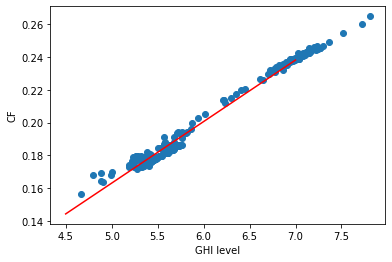

In [35]:
plt.scatter(cap_ghi.ghi,cap_ghi.cap_fac/100)
plt.plot(x,y,'r')
plt.xlabel('GHI level')
plt.ylabel('CF')
plt.savefig('corrghi.png')
plt.show()


In [36]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(cap_ghi.ghi,cap_ghi.cap_fac/100)

In [37]:
r_value**2

0.9871539871513928

In [38]:
slope

0.037479515135625474

In [39]:
intercept

-0.024312887907517094